# <font color = 'red'>Deep Learning Algorithm - TEST</font>
<br>

# 학습자명 : 김진산
# 소    속 : 대한민국

# CIFAR100 - Categorical Classification
> # VGG16

In [1]:
import warnings
warnings.filterwarnings('ignore')

* import Tensorflow

In [2]:
import tensorflow

tensorflow.__version__

'2.12.0'

# I. CIFAR100 Data_Set Load

In [3]:
from tensorflow.keras.datasets import cifar100

(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode = 'fine')

169001437/169001437 [==============================] - 6s 0us/step


# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape

In [4]:
X_train = X_train.reshape((50000,  32, 32, 3))
X_test = X_test.reshape((10000,  32, 32, 3))

# <font color = 'red'>1번 - 10점</font>
## <font color = 'blue'>X_train과 X_test에 대해서 Normalization을 수행하세요.</font>

* Normalization

In [5]:
# 1번 답안 작성

X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255



> ## 2) One Hot Encoding

# <font color = 'red'>2번 - 10점</font>
## <font color = 'blue'>y_train과 y_test에 대해서 One-Hot Encoding을 수행하세요.</font>

In [6]:
# 2번 답안 작성
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train.shape, y_test.shape

((50000, 100), (10000, 100))

> ## 3) train_test_split( )

* Train(40,000) vs. Validation(10,000)

In [7]:
from sklearn.model_selection import train_test_split 

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((40000, 32, 32, 3), (40000, 100), (10000, 32, 32, 3), (10000, 100))

# III. Import VGG16 Model

# <font color = 'red'>3번 - 20점</font>
## <font color = 'blue'>전이학습에 사용할 사전학습모델을 정의하세요.</font>

> ## 1) conv_base

In [8]:
# 3번 답안 작성
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (32, 32, 3))


58889256/58889256 [==============================] - 2s 0us/step


# IV. Keras Modeling

# <font color = 'red'>4번 - 20점</font>
## <font color = 'blue'>이미지 다중분류 CNN+DNN 신경망 구조를 정의하세요.</font>

> ## 1) Model Define

In [16]:
# 4번 답안 작성

from tensorflow.keras import models, layers
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())

model.add(layers.Dense(2048, activation = 'relu'))
model.add(layers.Dense(1024, activation = 'relu',
                       kernel_regularizer = regularizers.l2(0.001)))
model.add(layers.Dropout(0.15))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(256, activation = 'relu',
                       kernel_regularizer = regularizers.l2(0.001)))
model.add(layers.Dropout(0.05))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(100, activation ='softmax'))


In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 2048)              1050624   
                                                                 
 dense_9 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_10 (Dense)            (None, 512)               524800    
                                                                 
 dropout_6 (Dropout)         (None, 512)              

> ## 2) Model Compile

* 모델 학습방법 설정

# <font color = 'red'>5번 - 20점</font>
## <font color = 'blue'>model.compile( )을 완성하세요.</font>

In [18]:
# 5번 답안 작성
from tensorflow.keras import optimizers

model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(learning_rate = 0.000005),
              metrics = ['accuracy'])


> ## 3) Model Fit

* 약 ?분

# <font color = 'red'>6번 - 20점</font>
## <font color = 'blue'>model.fit( )을 완성하세요.</font>

In [19]:
# 6번 답안 작성

%%time

Hist_model = model.fit(X_train, y_train,
                       epochs = 30,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/30
313/313 [==============================] - 28s 66ms/step - loss: 6.0253 - accuracy: 0.0629 - val_loss: 5.3450 - val_accuracy: 0.2139
Epoch 2/30
313/313 [==============================] - 21s 66ms/step - loss: 5.1126 - accuracy: 0.2304 - val_loss: 4.5795 - val_accuracy: 0.3559
Epoch 3/30
313/313 [==============================] - 20s 64ms/step - loss: 4.5553 - accuracy: 0.3374 - val_loss: 4.3149 - val_accuracy: 0.3972
Epoch 4/30
313/313 [==============================] - 21s 67ms/step - loss: 4.2275 - accuracy: 0.3947 - val_loss: 4.1028 - val_accuracy: 0.4285
Epoch 5/30
313/313 [==============================] - 20s 65ms/step - loss: 3.9940 - accuracy: 0.4398 - val_loss: 3.9813 - val_accuracy: 0.4511
Epoch 6/30
313/313 [==============================] - 21s 68ms/step - loss: 3.8268 - accuracy: 0.4695 - val_loss: 3.8750 - val_accuracy: 0.4696
Epoch 7/30
313/313 [==============================] - 20s 64ms/step - loss: 3.6822 - accuracy: 0.4958 - val_loss: 3.8060 - val_accuracy:

> ## 4) 학습 결과 시각화

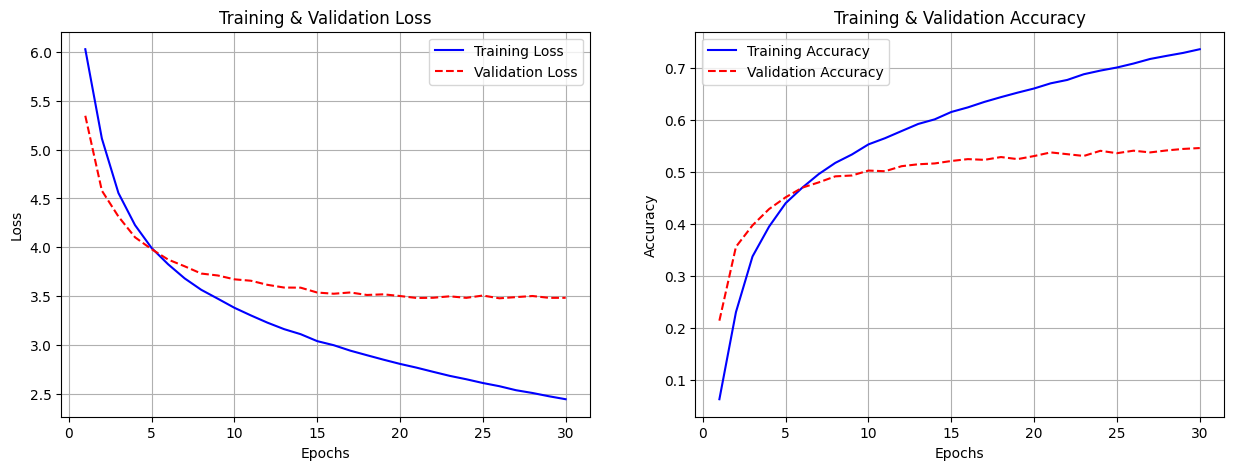

In [20]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_model.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_model.history['loss'], 'b-')
plt.plot(epochs, Hist_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_model.history['accuracy'], 'b-')
plt.plot(epochs, Hist_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

# <font color = 'red'>완료 조건</font>
## <font color = 'blue'>Accuracy : 0.55 이상</font>

In [21]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 3s 9ms/step - loss: 3.5069 - accuracy: 0.5403
Loss = 3.50688
Accuracy = 0.54030


# 
# 
# 
# The End
# 
# 
# 